<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/CH15_CreditDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data File: [creditcard.csv](https://drive.google.com/file/d/117FaJ-jjj0vMFCtApU6g1Th80hD8cnWd/view?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
# plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.drop('Time', axis=1, inplace=True)
df.dtypes.tail()

V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
size = df['Class'].value_counts()
pct = df['Class'].value_counts(normalize=True).round(3)
pd.DataFrame(zip(size, pct), columns=['次數', '百分比'], index=['No','Yes'])

,次數,百分比
No,284315,0.998
Yes,492,0.002


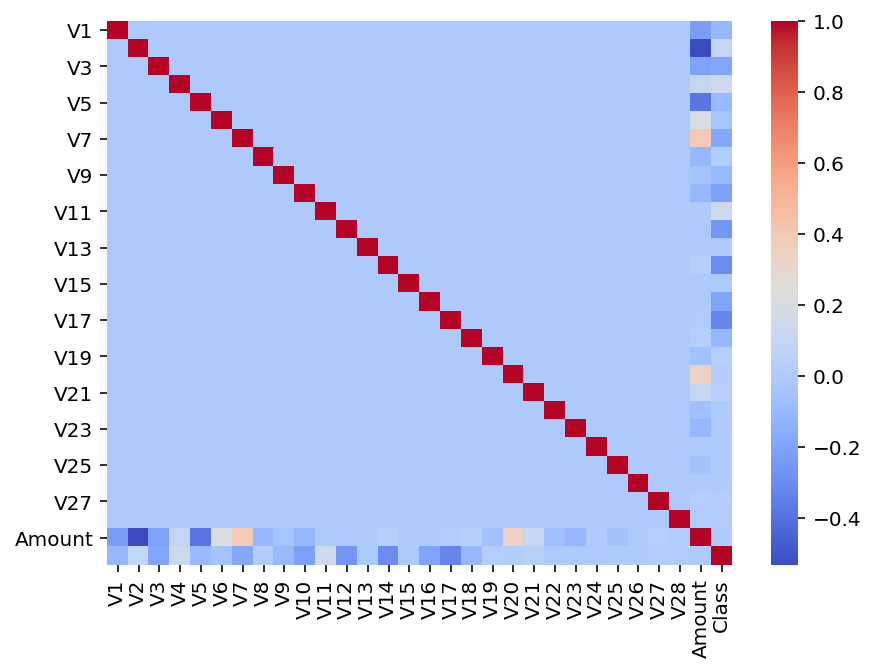

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), cmap='coolwarm');

In [ ]:
# ch15-6
df_corr = df.drop('Class',axis=1).corrwith(df['Class']).\
sort_values(ascending=False)
print(df_corr[:3])
print(df_corr[-3:])

V11    0.154876
V4     0.133447
V2     0.091289
dtype: float64
V12   -0.260593
V14   -0.302544
V17   -0.326481
dtype: float64


In [ ]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


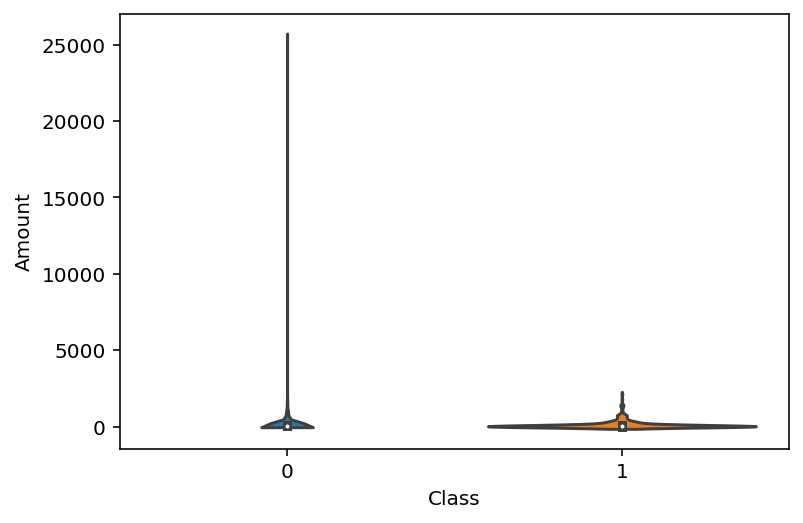

In [ ]:
sns.violinplot(x='Class', y='Amount', data=df);

In [ ]:
# ch15-9
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [ ]:
# ch15-10
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
dmy = DummyClassifier(strategy='most_frequent')
dmy.fit(X_train, y_train)
dmy.score(X_train, y_train)
y_pred = dmy.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9984082955888721
[[85307     0]
 [  136     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# ch15-11
# 載入所有模型
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import recall_score

models = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier()]
model_results = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    model_pl.fit(X_train, y_train)
    y_pred = model_pl.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    model_results[model.__class__.__name__] = [score, recall]
    print(f'模型名稱{model.__class__.__name__:-^50}')
    print('混亂矩陣\n',confusion_matrix(y_test, y_pred))
    print(f'正確率: {score:.3f}， 召回率: {recall:.3f}\n')

模型名稱----------------LogisticRegression----------------
混亂矩陣
 [[85295    12]
 [   51    85]]
正確率: 0.999， 召回率: 0.625

模型名稱-----------------------SVC------------------------
混亂矩陣
 [[85301     6]
 [   49    87]]
正確率: 0.999， 召回率: 0.640

模型名稱---------------KNeighborsClassifier---------------
混亂矩陣
 [[85291    16]
 [   31   105]]
正確率: 0.999， 召回率: 0.772

模型名稱--------------RandomForestClassifier--------------
混亂矩陣
 [[85299     8]
 [   23   113]]
正確率: 1.000， 召回率: 0.831



In [ ]:
# ch15-12
df_orig = pd.DataFrame(model_results.values(), index=model_results.keys(),
             columns=['prec','recall']).sort_values(by='recall', ascending=False)
df_orig

,prec,recall
RandomForestClassifier,0.999637,0.830882
KNeighborsClassifier,0.999450,0.772059
SVC,0.999356,0.639706
LogisticRegression,0.999263,0.625000


In [ ]:
# ch15-13
models = [LogisticRegression(class_weight='balanced'), SVC(class_weight='balanced'), 
          RandomForestClassifier(class_weight='balanced')]
model_results = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    model_pl.fit(X_train, y_train)
    y_pred = model_pl.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    model_results[model.__class__.__name__] = [score, recall]
    print(f'{model.__class__.__name__:-^50}')
    print(confusion_matrix(y_test, y_pred))
    print(f'正確率: {score:.3f}， 召回率: {recall:.3f}')
    print()

----------------LogisticRegression----------------
[[83114  2193]
 [   10   126]]
正確率: 0.974， 召回率: 0.926

-----------------------SVC------------------------
[[85080   227]
 [   31   105]]
正確率: 0.997， 召回率: 0.772

--------------RandomForestClassifier--------------
[[85303     4]
 [   29   107]]
正確率: 1.000， 召回率: 0.787



In [ ]:
# ch15-14
df_weight = pd.DataFrame(model_results.values(), index=model_results.keys(),
             columns=['prec','recall']).sort_values(by='recall', ascending=False)
df_weight

,prec,recall
LogisticRegression,0.974217,0.926471
RandomForestClassifier,0.999614,0.786765
SVC,0.996980,0.772059


In [ ]:
# ch15-15
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
np.random.seed(42)
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier()]
model_results = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), RandomUnderSampler(), model)
    model_pl.fit(X_train, y_train)
    y_pred = model_pl.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    model_results[model.__class__.__name__] = [score, recall]
    print(f'{model.__class__.__name__:-^50}')
    print(confusion_matrix(y_test, y_pred))
    print(f'正確率: {score:.3f}， 召回率: {recall:.3f}')
    print()

----------------LogisticRegression----------------
[[81974  3333]
 [    9   127]]
正確率: 0.961， 召回率: 0.934

-----------------------SVC------------------------
[[83857  1450]
 [   13   123]]
正確率: 0.983， 召回率: 0.904

---------------KNeighborsClassifier---------------
[[82633  2674]
 [   11   125]]
正確率: 0.969， 召回率: 0.919

--------------RandomForestClassifier--------------
[[83018  2289]
 [    8   128]]
正確率: 0.973， 召回率: 0.941

